In [7]:

%matplotlib inline

import scipy as sp
from scipy import signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')



In [8]:
Omega_Max = 10 #rad
e_Max = 2 #rad^2
M = 1.5
X_Max = 0.5 #grad

FromRadToGrad = np.pi/180
Omega_Max = Omega_Max*FromRadToGrad
e_Max = e_Max*(FromRadToGrad**2)




In [9]:
w_k = e_Max/Omega_Max
g_max = (Omega_Max**2)/e_Max

w_0 = np.sqrt(e_Max/X_Max)

w_C = np.sqrt(M/(M-1))*w_0
w_2 = (M-1)/M*w_C
w_3 = (M+1)/M*w_C

k = 10**(np.log10(g_max/X_Max))



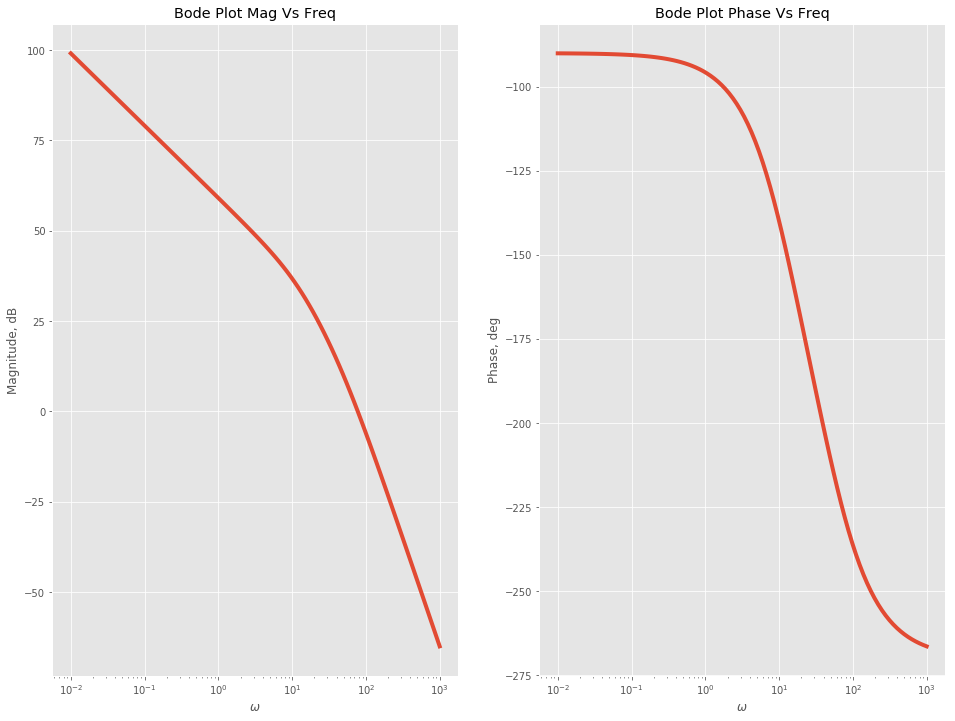

In [10]:
###Original

W_s = signal.lti([900],[0.08*0.02,0.1,1,0])
#step = signal.step(W_s)
#impulse = signal.impulse(W_s)
w, mag, phase = signal.bode(W_s)


plt.subplot(1,2,1)

plt.semilogx(w, mag, linewidth = 4.0)
plt.xlabel('$\omega$')
plt.ylabel('Magnitude, dB')
plt.title('Bode Plot Mag Vs Freq')

plt.subplot(1,2,2)

plt.semilogx(w, phase, linewidth = 4.0)
plt.xlabel('$\omega$')
plt.ylabel('Phase, deg')
plt.title('Bode Plot Phase Vs Freq')


plt.savefig('OriginalSystem')


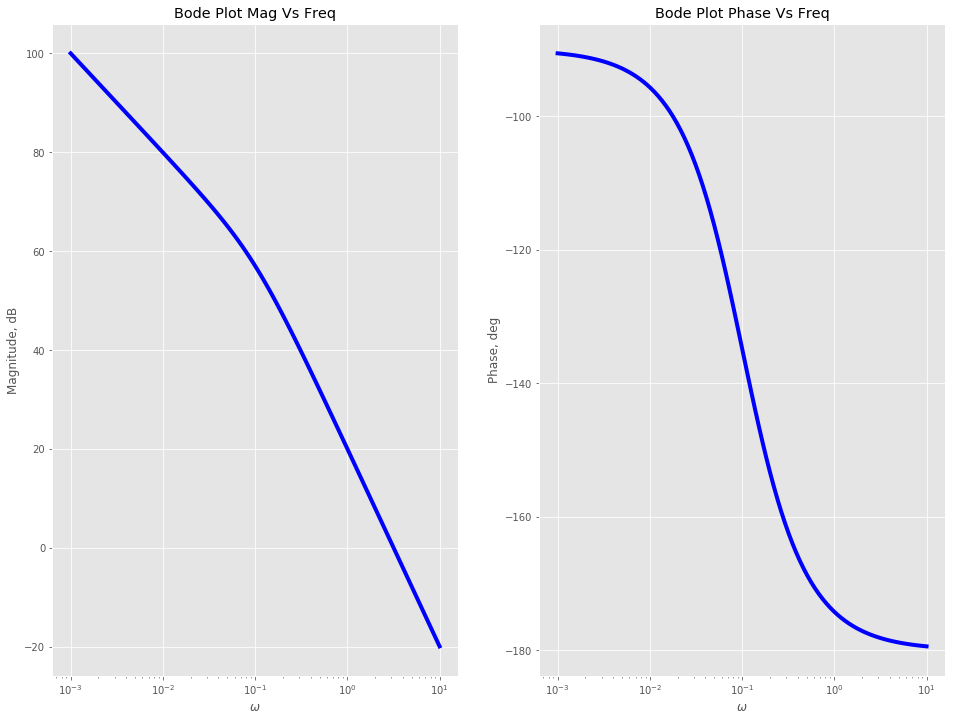

In [11]:
###WishFunc

G_s = signal.lti([k/w_C, k],[1/(w_C*w_3), (1/w_C + 1/w_3), 1,0])

w, mag, phase = signal.bode(G_s)


plt.subplot(1,2,1)

plt.semilogx(w, mag, linewidth = 4.0, color = 'b')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude, dB')
plt.title('Bode Plot Mag Vs Freq')

plt.subplot(1,2,2)

plt.semilogx(w, phase, linewidth = 4.0, color = 'b')
plt.xlabel('$\omega$')
plt.ylabel('Phase, deg')
plt.title('Bode Plot Phase Vs Freq')


plt.savefig('WishSystem')

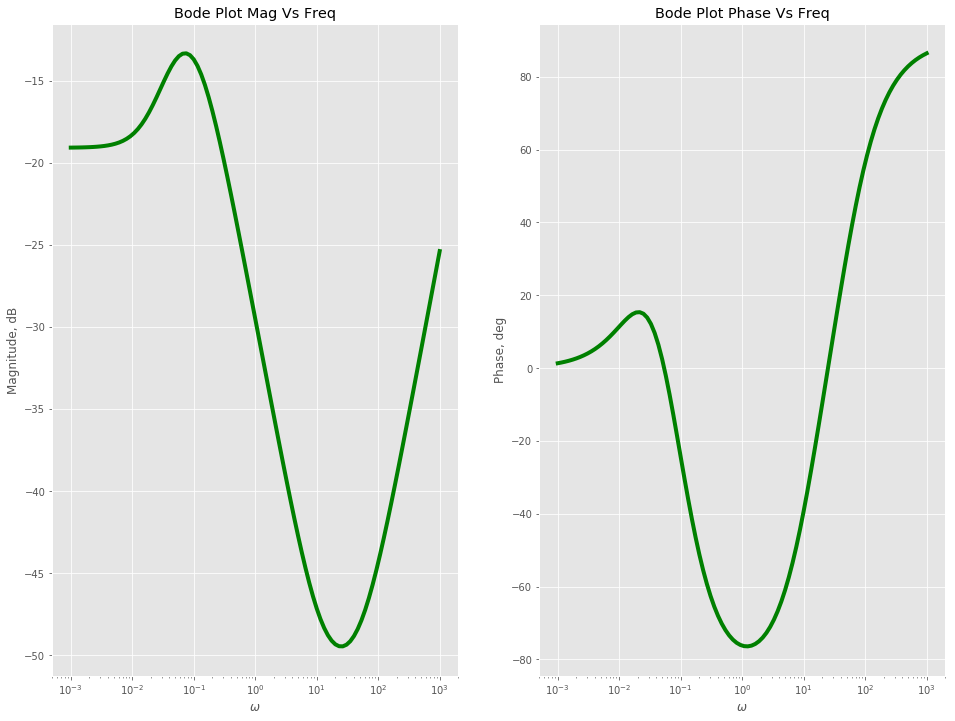

In [14]:
##AdjustFunc

Wk = signal.lti([k/w_2*0.08*0.02, (0.02*k/w_2 +0.08*0.02*k +k/w_2*0.08),(0.02*k +k/w_2 +k*0.08),k, 0],[900/(w_C*w_3), (900/w_C + 900/w_3), 900,0])



w, mag, phase = signal.bode(Wk)


plt.subplot(1,2,1)

plt.semilogx(w, mag, linewidth = 4.0, color = 'g')
plt.xlabel('$\omega$')
plt.ylabel('Magnitude, dB')
plt.title('Bode Plot Mag Vs Freq')

plt.subplot(1,2,2)

plt.semilogx(w, phase, linewidth = 4.0, color = 'g')
plt.xlabel('$\omega$')
plt.ylabel('Phase, deg')
plt.title('Bode Plot Phase Vs Freq')


plt.savefig('AdjSystem')